<h3 align='center'>FEATURE SCALING WITH SCIKIT-LEARN</h3>


`Feature scaling` is a method used to `normalize` the range of `independent variables or features of data` or X. In data processing, it is also known as data normalization and is generally performed during the data preprocessing.

1. Rescaling (min-max normalization)
2. Mean normalization
3. Standardization (Z-score Normalization)
4. Scaling to unit length

feature scaling that are implemented in scikit-learn:

1. StandardScaler
2. MinMaxScaler
3. RobustScaler
4. Normalizer

1.  **Standard Scaler**

The StandardScaler assumes your data is **normally distributed** within each feature and will scale them such that the distribution is now centred around `0`, with a standard deviation of `1`.

The mean and standard deviation are calculated for the feature and then the feature is scaled based on:

<h1 align=center>$\dfrac{x_i – mean(x)}{stdev(x)}$</h1>


In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
np.random.seed(1)
df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})
df.head()

,x1,x2,x3
0,3.248691,4.632578,-14.657819
1,-1.223513,5.684509,-5.802131
2,-1.056344,3.943085,-9.161098
3,-2.145937,2.508340,-6.030558
4,1.730815,4.216731,0.131275


In [3]:
df.describe()

,x1,x2,x3
count,10000.000000,10000.000000,10000.000000
mean,0.019545,5.028306,-5.073018
std,1.997672,3.003718,4.979994
min,-7.312880,-5.354209,-26.165824
25%,-1.325850,2.983117,-8.432691
50%,0.016908,5.056408,-5.087269
75%,1.343618,7.066050,-1.785300
max,8.053698,17.504353,13.298829


In [4]:
df.tail()

,x1,x2,x3
9995,0.145917,2.170375,-1.550878
9996,0.978204,7.346647,-2.235902
9997,-2.028288,12.225301,-5.419191
9998,-0.125392,7.648357,-11.417673
9999,-2.875740,4.701211,-3.288438


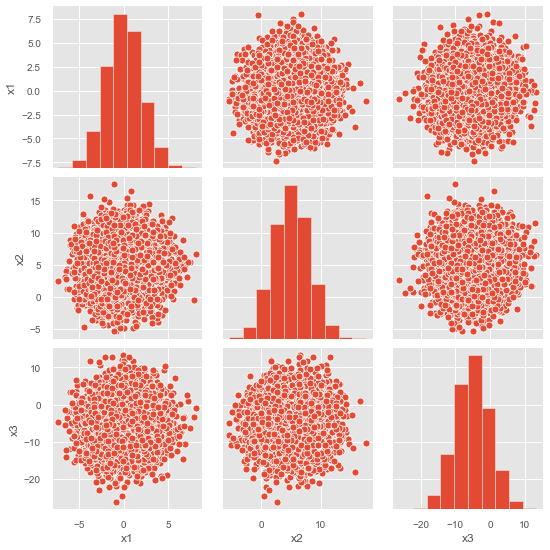

In [5]:
sns.pairplot(df)

In [6]:
pandas_profiling.ProfileReport(df)

In [7]:
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df

array([[ 1.61653543, -0.13175263, -1.9247574 ],
       [-0.62228462,  0.21847458, -0.14641572],
       [-0.53859835, -0.36131085, -0.82094159],
       ...,
       [-1.02516118,  2.39614871, -0.06951623],
       [-0.07255698,  0.87231272, -1.27409225],
       [-1.44940235, -0.10890221,  0.35836759]])

In [8]:
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])

In [9]:
scaled_df.head()

,x1,x2,x3
0,1.616535,-0.131753,-1.924757
1,-0.622285,0.218475,-0.146416
2,-0.538598,-0.361311,-0.820942
3,-1.084057,-0.838991,-0.192287
4,0.856675,-0.270204,1.045092


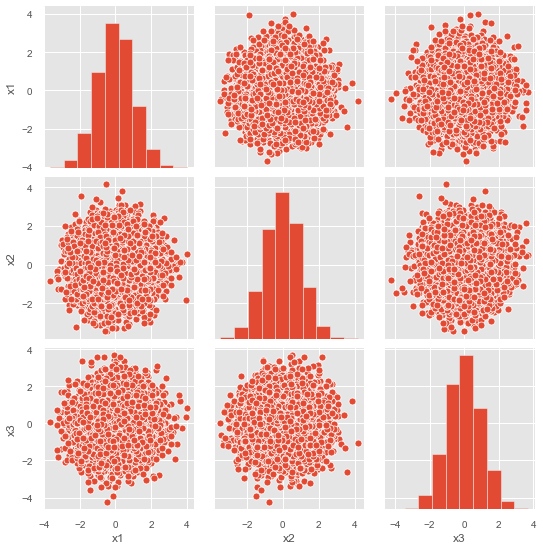

In [10]:
sns.pairplot(scaled_df,diag_kind='hist')

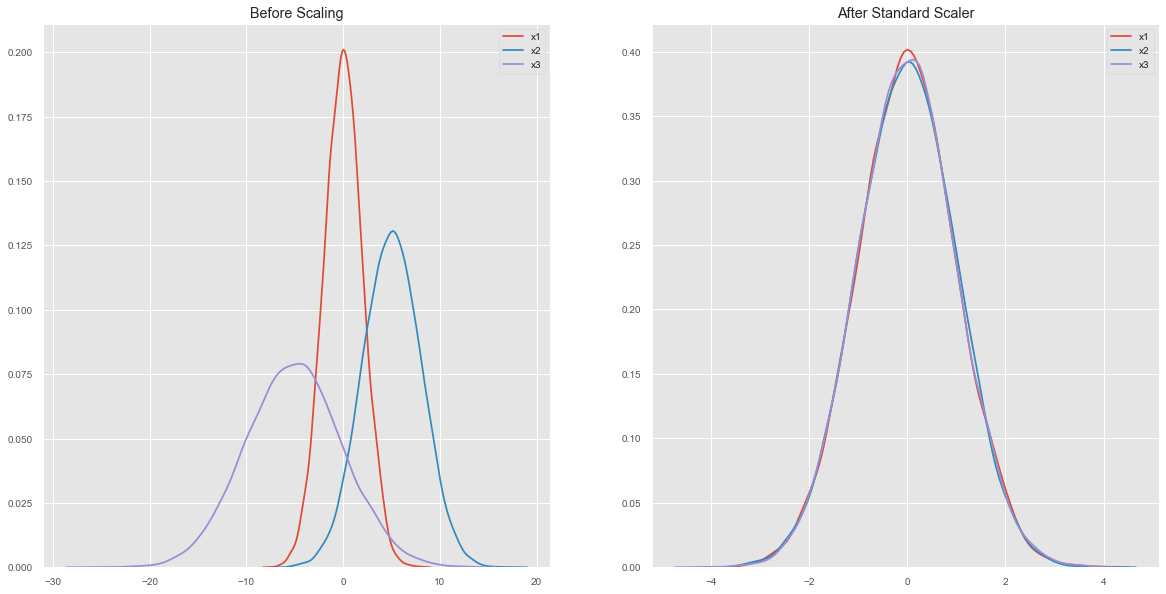

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))

ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)   # kernal density estimation
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)

ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

All features are now on the same scale relative to one another.

2. #### Min-Max Scaler
The MinMaxScaler is the probably the most famous scaling algorithm, and follows the following formula for each feature:

$\dfrac{x_i – min(x)}{max(x) – min(x)}$

It essentially shrinks the range such that the range is now between `0` and `1` (or `-1` to `1` if there are negative values).

This scaler works better for cases in which the standard scaler might not work so well. If the distribution is not Gaussian or the `standard deviation is very small`, the min-max scaler works better.

However, it is sensitive to outliers, so if there are outliers in the data, you might want to consider the **Robust Scaler** below.

For now, let’s see the min-max scaler in action

In [12]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})
df.head()

,x1,x2,x3
0,8.913396,33.282653,54.509849
1,5.583017,38.986294,52.473472
2,19.713205,26.377055,48.803613
3,23.293714,31.520740,50.593609
4,11.508381,38.646724,49.702286


In [ ]:
pandas_profiling.ProfileReport(df)

In [15]:
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])

In [14]:
scaled_df.head()

,x1,x2,x3
0,0.320592,0.776009,0.748636
1,0.184702,0.971903,0.645125
2,0.761260,0.538834,0.458583
3,0.907357,0.715496,0.549570
4,0.426476,0.960240,0.504263


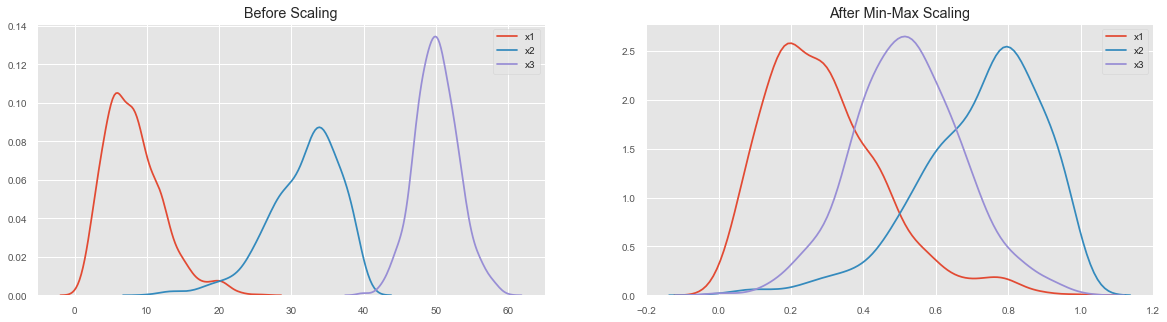

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)

ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

Notice that the skewness of the distribution is maintained but the 3 distributions are brought into the same scale so that they overlap.

3. #### Robust Scaler
The RobustScaler uses a similar method to the Min-Max scaler but it instead uses the `interquartile range`, rathar than the min-max, so that it is robust to outliers. Therefore it follows the formula:

$\dfrac{x_i – Q_1(x)}{Q_3(x) – Q_1(x)}$

For each feature.

Of course this means it is using the less of the data for scaling so it’s more suitable for when there are outliers in the data.

Let’s take a look at this one in action on some data with outliers

In [17]:
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})
x.head()

,x1,x2
0,21.289328,30.339567
1,20.475220,28.989049
2,20.472324,29.108980
3,17.862670,30.381639
4,20.554138,28.639373


In [18]:
scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(x)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['x1', 'x2'])

In [19]:
robust_scaled_df.head()

,x1,x2
0,0.946526,0.203267
1,0.319729,-0.692477
2,0.317499,-0.612932
3,-1.691723,0.231172
4,0.380490,-0.924403


In [20]:
scaler = preprocessing.MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(x)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=['x1', 'x2'])

In [21]:
minmax_scaled_df.head()

,x1,x2
0,0.922261,0.125539
1,0.888763,0.069703
2,0.888644,0.074662
3,0.781266,0.127279
4,0.892010,0.055246


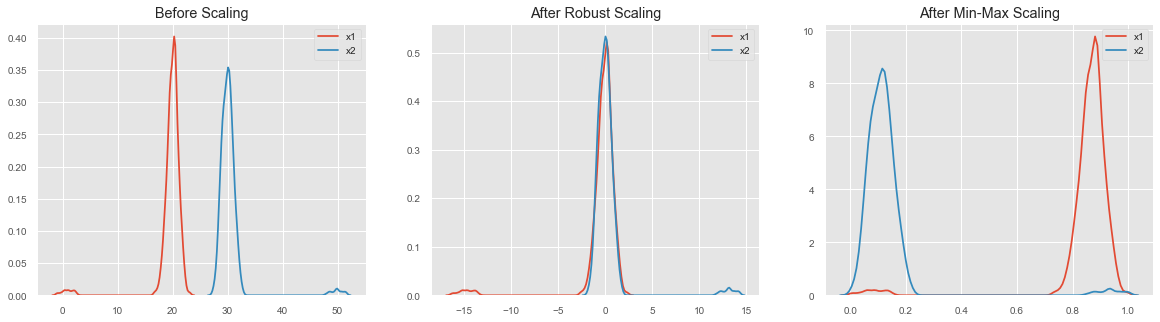

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax=ax1)
sns.kdeplot(x['x2'], ax=ax1)

ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['x1'], ax=ax2)
sns.kdeplot(robust_scaled_df['x2'], ax=ax2)

ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled_df['x1'], ax=ax3)
sns.kdeplot(minmax_scaled_df['x2'], ax=ax3)
plt.show()

Notice that after Robust scaling, the distributions are brought into the same scale and overlap, but the outliers remain outside of bulk of the new distributions.

However, in Min-Max scaling, the two normal distributions are kept seperate by the outliers that are inside the 0-1 range.


4. #### Normilization: or Normalizer


The normalizer scales each value by dividing each value by its magnitude in n-dimensional space for n number of features.

Say your features were 
* x, 
* y and 
* z Cartesian co-ordinates your scaled value for x would be:

<h2 align='center'>$\dfrac{x_i}{\sqrt{x_i^2 + y_i^2 + z_i^2}}$<h2/>

In [23]:
from mpl_toolkits.mplot3d import Axes3D

df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

df.head()

,x1,y1,z1
0,-7.0,-68.0,67.0
1,64.0,-5.0,-82.0
2,-99.0,62.0,8.0
3,58.0,32.0,-26.0
4,50.0,9.0,123.0


In [ ]:
df.tail()

In [24]:
scaler = preprocessing.Normalizer()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

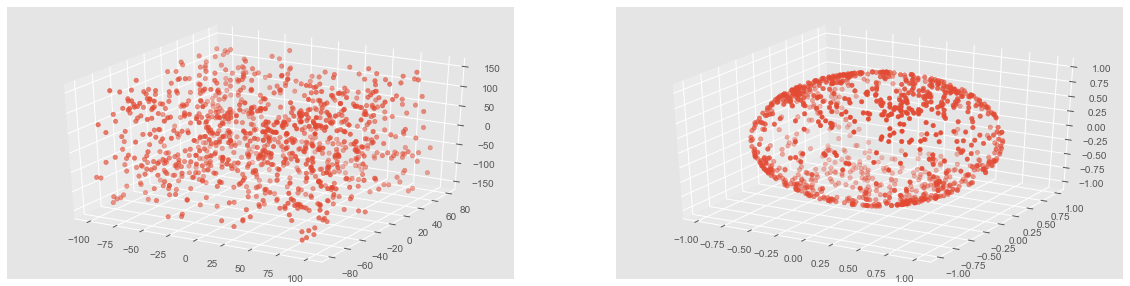

In [25]:
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(df['x1'], df['y1'], df['z1'])
ax2.scatter(scaled_df['x1'], scaled_df['y1'], scaled_df['z1'])
plt.show()

Note that the points are all brought within a sphere that is at most 1 away from the origin at any point. Also, the axes that were previously different scales are now all one scale.
![](https://lh3.googleusercontent.com/-U7vKxBXvOHA/XnH9DT8s9ZI/AAAAAAAAnXM/P9I-t_QzghsKT-Pjze6rOyj6OMF95NDHQCK8BGAsYHg/s0/2020-03-18.png)
